# Try This Exercise

In this exercise, please create two rather pathological data sets and test the MLP on them.

For the first one, use `sklearn.datasets.make_moons` as:

     dataset1=make_moons(n_samples=200,noise=0.3)
     
For the second one, use 

     dataset2=make_circles(n_samples=200,noise=0.2, factor=0.5, random_state=1)
     
These commands basically take a square of randomly-placed data and overlay a moon or circle shape on them, with noise. 
     
For each of them, run the `MLPClassifier` as above.  Then, for each: 
- Determine the score.  
- Since these will be 2D datasets, use the `meshgrid` as above to show the decision boundary.  

In [2]:
## Initiate python stuff
## Execute twice to make sure it takes effect
%pylab inline
import numpy as np
import scipy.stats

fontsize = 8
figsize = (4,4)
dpi = 200

# Configure parameters
plt.rcParams.update({'font.size': fontsize, 'figure.figsize': figsize, 'figure.dpi':dpi})

# Default tick label size
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1

plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['axes.linewidth'] = 1

Populating the interactive namespace from numpy and matplotlib


/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['figsize']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
# Import relevant packages
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
# Generate first data set
dataset1=make_moons(n_samples=200,noise=0.3)
X1 = dataset1[0]
Y1 = dataset1[1]



In [5]:
# Scale
X1 = StandardScaler().fit_transform(X1)

In [6]:
# Split into training and test set
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=.4, random_state=42)


In [7]:
# Classify and score
clf_mlp_1=MLPClassifier()

clf_mlp_1.fit(X1_train,Y1_train)
score_1=clf_mlp_1.score(X1_test,Y1_test)
print(score_1)

0.8625


/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [8]:
# Determine decision boundary 
h=0.02
x_min, x_max = X1[:, 0].min() - .5, X1[:, 0].max() + .5
y_min, y_max = X1[:, 1].min() - .5, X1[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

Z_mlp = clf_mlp_1.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z_mlp=Z_mlp.reshape(xx.shape)


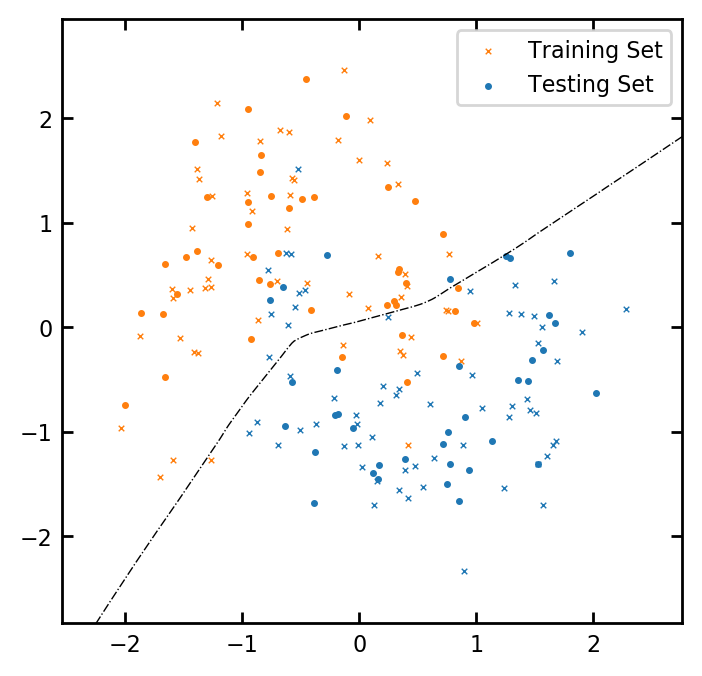

In [9]:
# Plot

colors = ['tab:orange','tab:blue']
fig, ax = plt.subplots()

# Training set
ax.scatter(X1_train[Y1_train==0,0],X1_train[Y1_train==0,1], s = 4, label = 'Training Set', marker = 'x', linewidth = 0.5, color = colors[0])
ax.scatter(X1_train[Y1_train==1,0],X1_train[Y1_train==1,1], s = 4, marker = 'x', linewidth = 0.5, color = colors[1])

# Test set
ax.scatter(X1_test[Y1_test==0,0],X1_test[Y1_test==0,1], s = 4, marker = 'o', linewidth = 0.5, color = colors[0])
ax.scatter(X1_test[Y1_test==1,0],X1_test[Y1_test==1,1], s = 4, label = 'Testing Set', marker = 'o', linewidth = 0.5, color = colors[1])


# Decision boundary
ax.contour(xx,yy,Z_mlp,[0.5],colors='k', linewidths = 0.5, linestyles = '-.')

ax.legend(fontsize = 8)


The score for this classification is $\textbf{ 0.8625} $.

__________________________

In [10]:
# Generate second data set
dataset2=make_circles(n_samples=200,noise=0.2, factor=0.5, random_state=1)
X2 = dataset2[0]
Y2 = dataset2[1]


In [11]:
# Split into training and test set
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=.4, random_state=42)


In [12]:
# Classify and Score
clf_mlp_2=MLPClassifier()

clf_mlp_2.fit(X2_train,Y2_train)
score_2=clf_mlp_2.score(X2_test,Y2_test)
print(score_2)

0.8875


/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [13]:
# Determine decision boundary 
h=0.02
x_min, x_max = X2[:, 0].min() - .5, X2[:, 0].max() + .5
y_min, y_max = X2[:, 1].min() - .5, X2[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

Z_mlp = clf_mlp_2.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z_mlp=Z_mlp.reshape(xx.shape)

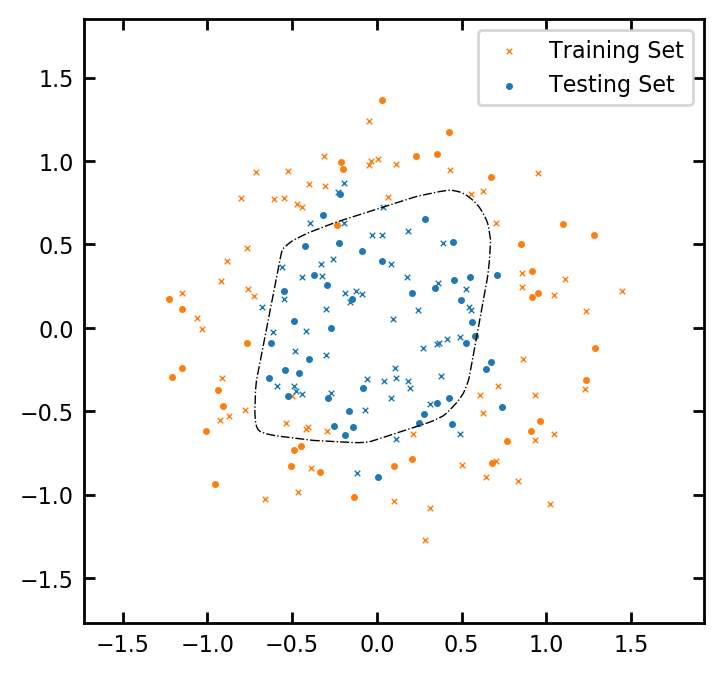

In [14]:
# Plot

colors = ['tab:orange','tab:blue']
fig, ax = plt.subplots()

# Training set
ax.scatter(X2_train[Y2_train==0,0],X2_train[Y2_train==0,1], s = 4, label = 'Training Set', marker = 'x', linewidth = 0.5, color = colors[0])
ax.scatter(X2_train[Y2_train==1,0],X2_train[Y2_train==1,1], s = 4, marker = 'x', linewidth = 0.5, color = colors[1])

# Test set
ax.scatter(X2_test[Y2_test==0,0],X2_test[Y2_test==0,1], s = 4, marker = 'o', linewidth = 0.5, color = colors[0])
ax.scatter(X2_test[Y2_test==1,0],X2_test[Y2_test==1,1], s = 4, label = 'Testing Set', marker = 'o', linewidth = 0.5, color = colors[1])


# Decision boundary
ax.contour(xx,yy,Z_mlp,[0.5],colors='k', linewidths = 0.5, linestyles = '-.')

ax.legend(fontsize = 8)

The score for this classification is $\textbf{ 0.8875} $.